# Simple Linear Regression

Importing Data set

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
try:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
except FileNotFoundError:
    print("File not found")
print(train)
print(test)

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]
      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]


# Data Preprocessing

Handling Missing Data

In [2]:
# Checking for null values in train data
train.isnull().sum()

x    0
y    1
dtype: int64

In [3]:
# Checking for null values in test data
test.isnull().sum()

x    0
y    0
dtype: int64

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

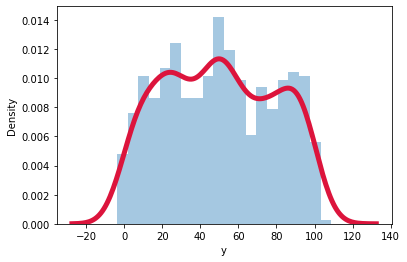

In [4]:
#Checking for normal distribution of y column of train
sns.distplot(train['y'], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [5]:
# Fill missing numeric value in train data with mean of that column because columns are normally distributed
train = train.fillna(train.mean(numeric_only=True))
train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


Graph of outliers

<AxesSubplot:xlabel='x', ylabel='y'>

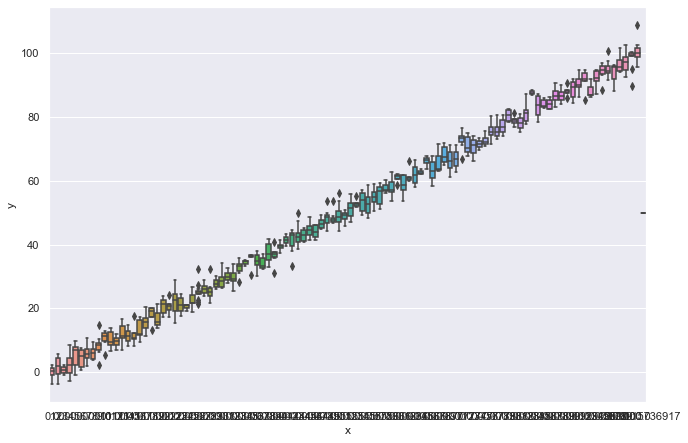

In [6]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.boxplot(x=train["x"],y=train["y"])

Removing Outliers

In [7]:
list = ["x","y"]
for i in list:
    percentiles = train[i].quantile([0.25,0.75]).values
    train[i][train[i] <= percentiles[0]] = percentiles[0]
    train[i][train[i] >= percentiles[1]] = percentiles[1]

Feature Scaling

In [8]:
# Feature scaling using Standardization
for col in train.columns[:]:
   train[col] = (train[col] - train[col].mean())/train[col].std()
print("Train Data")
print(train)

for col in test.columns[:]:
   test[col] = (test[col] - test[col].mean())/test[col].std()
print("Test data")
print(test)

Train Data
            x         y
0   -1.214162 -1.215505
1    0.018383 -0.104232
2   -1.214162 -1.215505
3   -0.573239 -0.642009
4    1.250927  1.251138
..        ...       ...
695  0.412797  0.446028
696  1.250927  1.251138
697  1.250927  1.251138
698  0.807211  0.695866
699  1.250927  1.251138

[700 rows x 2 columns]
Test data
            x         y
0    0.914365  0.982754
1   -1.050251 -0.964099
2   -1.015169 -0.880443
3   -1.085334 -1.147092
4   -0.524015 -0.321799
..        ...       ...
295  0.703871  0.596490
296 -0.173190 -0.133126
297  0.142552  0.099258
298  0.388129  0.415944
299 -0.138108  0.043149

[300 rows x 2 columns]


# Building model using train data

Splitting columns of train and test dataset and Converting dataset into numpy array

In [9]:
x_train = np.array(train['x']).reshape(700,1)
y_train = np.array(train['y']).reshape(700,1)

x_test = np.array(test['x']).reshape(300,1)
y_test = np.array(test['y']).reshape(300,1)
x_train.shape

(700, 1)

Add one column in x train and x test array for x0 which is equal to one

In [10]:
x0_train = np.ones((len(x_train),1))
X0_test = np.ones((len(x_test),1))
print(x0_train.shape)

new_x_train = np.c_[x0_train,x_train]
new_x_test = np.c_[X0_test,x_test]
new_x_train

(700, 1)


array([[ 1.        , -1.21416172],
       [ 1.        ,  0.01838252],
       [ 1.        , -1.21416172],
       ...,
       [ 1.        ,  1.25092675],
       [ 1.        ,  0.80721083],
       [ 1.        ,  1.25092675]])

Function for Calculating Hypothesis value of x train data 

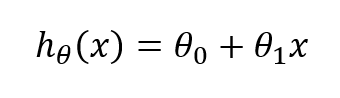

In [11]:
Image("Univariate linear equation.PNG", width = 200, height = 50)

In [12]:
def hypothesis(x,theta):
    hypothesis_of_theta = np.dot(x,theta)
    return hypothesis_of_theta

Function for Calculating cost function of linear regression with one variable

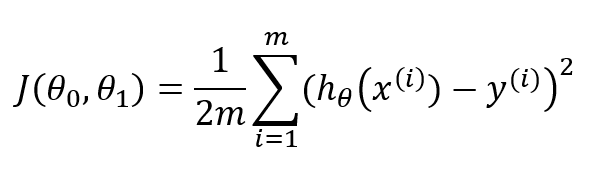

In [13]:
Image("CostFunction.PNG", width = 350, height = 100)

In [14]:
def cost_function(x,y,theta):
    m = len(x)
    hypothesis_of_theta = hypothesis(x,theta)
    temp = (hypothesis_of_theta - y) ** 2
    j_of_theta = temp.sum()/(2*m)
    return j_of_theta

Function for Minimizing cost function using Gradient Decent

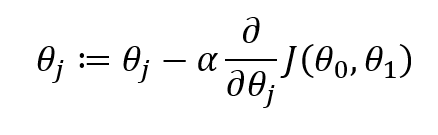

In [15]:
Image("Gradient Decent.PNG", width = 350, height = 100)

In [16]:
def gradient_descent(x,y,theta,alpha,steps):
    m = len(x)
    cost_function_values = []
    theta0 =[]
    theta1 = []
    theta_values = []
    for i in range(steps):
        hypothesis_of_theta = hypothesis(x,theta)
        #print(hypothesis_of_theta)
        temp = np.dot(x.T,(hypothesis_of_theta - y))
        #print(temp)
        derivatives = temp*(alpha/m)
        theta = theta - derivatives
        #print(f"Step {i+1} : theta 0 : {theta[0]} theta 1 : {theta[1]}")
        theta0.append(theta[0].tolist())
        theta1.append(theta[1].tolist())
        theta_values.append(theta)
        cost_function_values.append(cost_function(x,y,theta).tolist())
    return theta,cost_function_values ,theta0,theta1,theta_values


Training data by calling function

In [17]:
theta = np.zeros((2,1))
steps = 1000
alpha = 0.01
print(f"Initial : theta 0 : {theta[0]} theta 1 : {theta[1]}")

#calling gradient decent function for minimizing theta 0 and theta 1 by passing x train data, y train data , 
#theta array which contains theta 0 and theta 1 as 0 , alpha and steps for gradient decent 
minimize_j_of_theta,cost_function_values,theta0,theta1 ,theta_values= gradient_descent(new_x_train,y_train,theta,alpha,steps)
print(f"Final Theta 0 : {minimize_j_of_theta[0]} Theta 1 : {minimize_j_of_theta[1]}")
#print(f"\n\nCost function after every iteration : {cost_function_values}")
theta0 = np.array(theta0).flatten()
theta1 = np.array(theta1).flatten()
cost_function_values = np.array(cost_function_values).flatten()

Initial : theta 0 : [0.] theta 1 : [0.]
Final Theta 0 : [2.78465544e-16] Theta 1 : [0.99444963]


# Testing

Calling function of hypothesis for x test data to find y predicted value

In [18]:
y_predicted = hypothesis(new_x_test,minimize_j_of_theta)
#print(y_predicted)

Finding the accuracy of our model by comparing real y test with y value predicted by model

In [19]:
print(f"Accuracy of model : {round(metrics.r2_score(y_test,y_predicted),2)}")          

Accuracy of model : 0.99


# Graph Representation

Text(0.5, 1.0, 'X train  Vs  Y train')

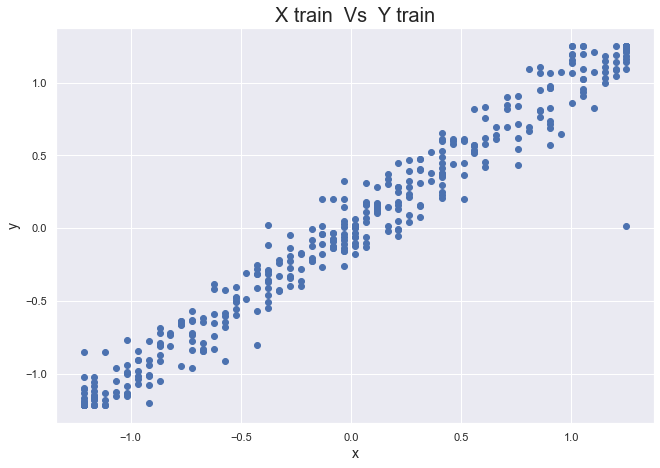

In [20]:
plt.scatter(train["x"],train["y"])
plt.xlabel("x",fontsize = 14)
plt.ylabel("y",fontsize = 14)
plt.title("X train  Vs  Y train" ,fontsize = 20)

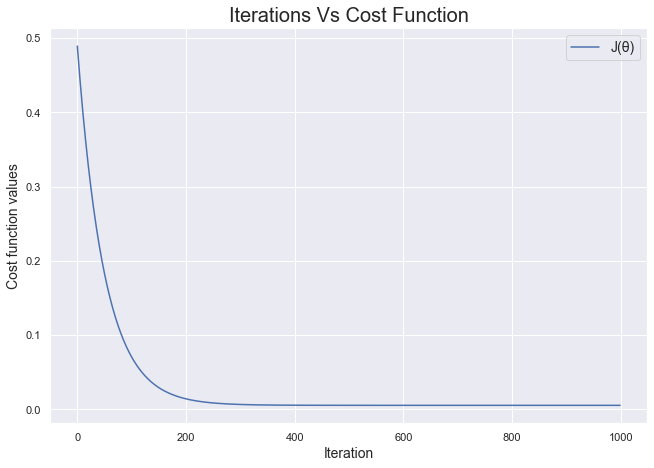

In [21]:
plt.plot(cost_function_values,label = "J(θ)")
plt.title("Iterations Vs Cost Function" ,fontsize = 20)
plt.xlabel("Iteration",fontsize = 14)
plt.ylabel("Cost function values",fontsize = 14)
plt.legend(fontsize = 14)

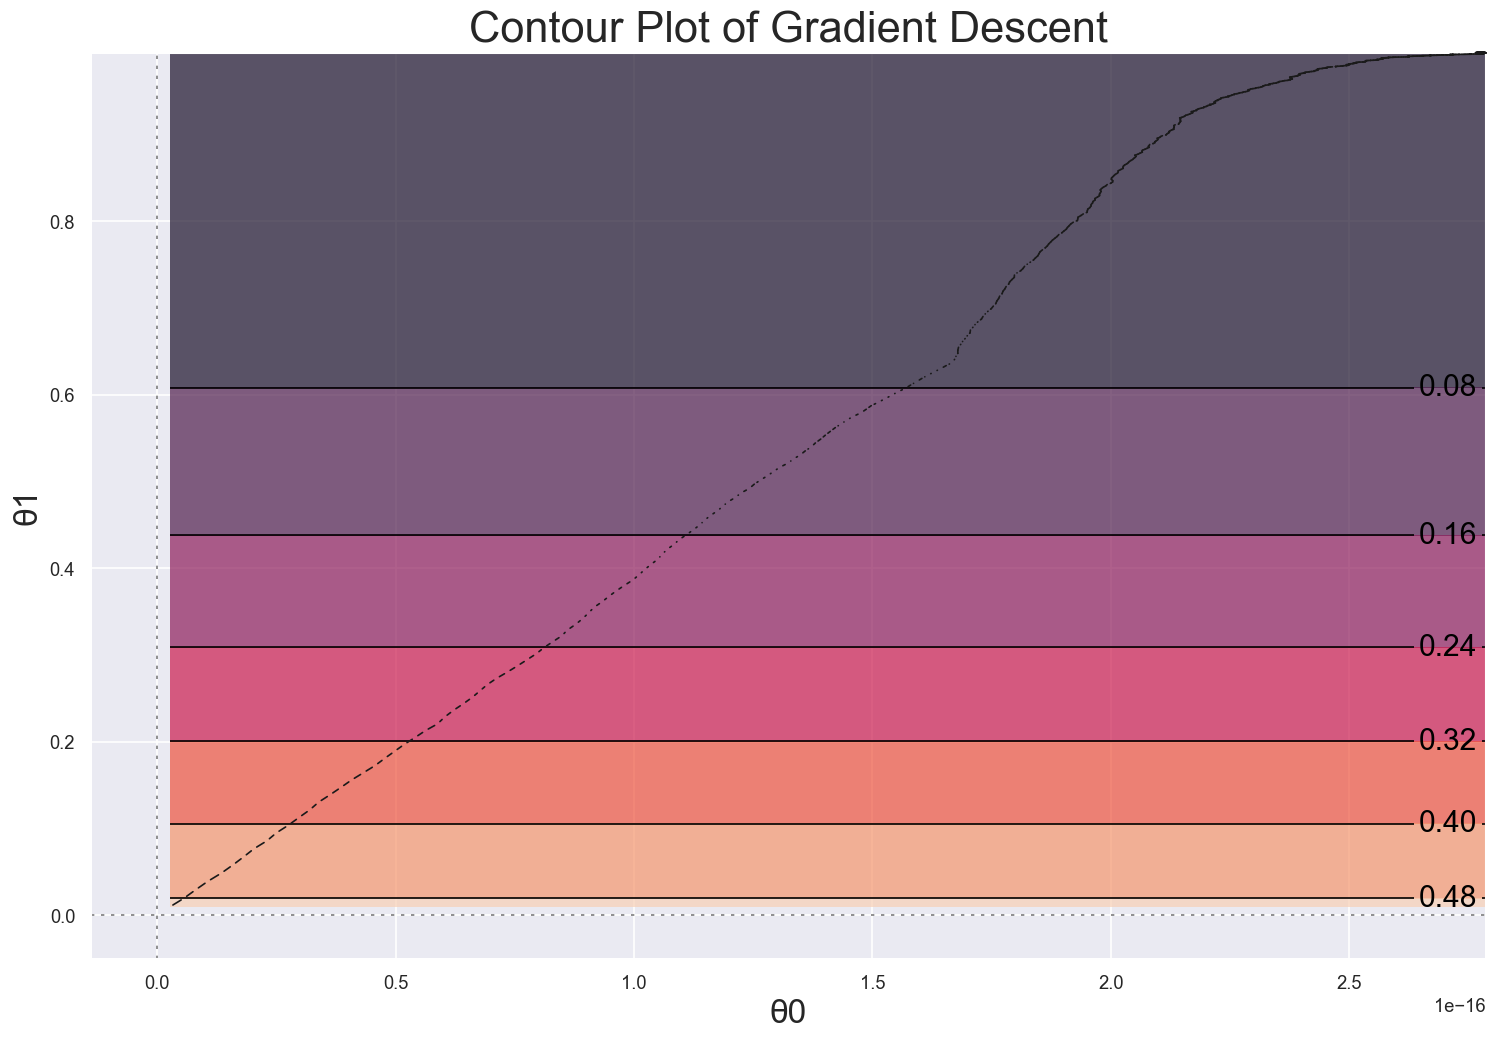

In [22]:

x = np.linspace(np.min(theta0),np.max(theta0),steps)
y = np.linspace(np.min(theta1),np.max(theta1),steps)
z = np.zeros([steps,steps])
#print(z)

for i in range(steps):
    for j in range(steps):
        t = np.array([x[i],y[i]])
        t = t.reshape(-1,1)
        z[i,j] = cost_function(new_x_train,y_train,t)

all_ws = np.array(theta_values)
fig, ax = plt.subplots(figsize=(15, 10), dpi=120)
plt.contourf(x, y, z,alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(theta0) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '-', 'color': 'k', 'lw': 1},
                 va='center', ha='center')
 
CS = ax.contour(x, y, z, linewidths=1,colors='black')
ax.clabel(CS, inline = True ,fontsize=18)
plt.title("Contour Plot of Gradient Descent",fontsize = 26)
plt.xlabel("θ0",fontsize = 20)
plt.ylabel("θ1",fontsize = 20)
plt.show()

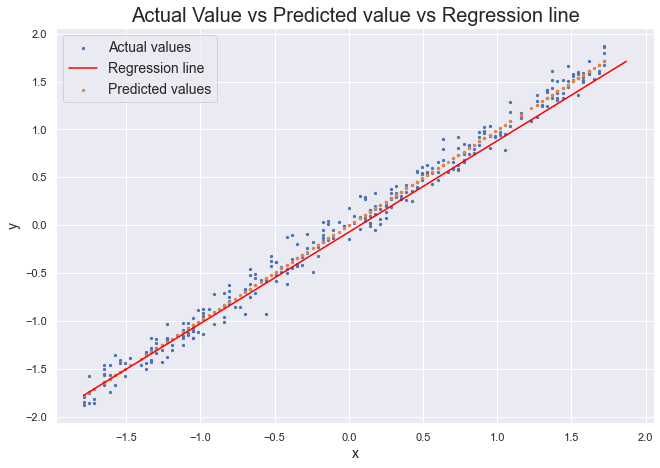

In [23]:
plt.scatter(x_test, y_test,s = 5,label="Actual values") 
plt.plot([min(x_test), max(y_test)], [min(y_predicted), max(y_predicted)], color='red',label = "Regression line")  # regression line
plt.xlabel("x" ,fontsize = 14)
plt.scatter(x_test, y_predicted,s = 5,label = "Predicted values") 
plt.ylabel("y",fontsize = 14)
plt.legend(fontsize = 14)
plt.title("Actual Value vs Predicted value vs Regression line",fontsize = 20)
plt.show()

# Building model using Sci-kit Learn 

In [24]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
reg.score(x_train,y_train)
print(f"Accuracy of model : {round(metrics.r2_score(y_test,y_pred),2)}") 
print(f"Coefficient (theta 1) : {reg.coef_}")
print(f"Intercept (theta 0) : {reg.intercept_}")

Accuracy of model : 0.99
Coefficient (theta 1) : [[0.99449319]]
Intercept (theta 0) : [2.69019127e-16]
